In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
Dataset = pd.read_csv("AutoInsurance (1).csv")
Dataset.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
Data = Dataset.drop(['State','Effective To Date'], axis=1)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   EmploymentStatus               9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [16]:
data = Data.iloc[:,[0,2,3,4,5,6,8,9,15,16,17,18,20,21,1,7,10,11,12,13,14,19]]

In [17]:
data.info() # arranged in str and int 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Response                       9134 non-null   object 
 2   Coverage                       9134 non-null   object 
 3   Education                      9134 non-null   object 
 4   EmploymentStatus               9134 non-null   object 
 5   Gender                         9134 non-null   object 
 6   Location Code                  9134 non-null   object 
 7   Marital Status                 9134 non-null   object 
 8   Policy Type                    9134 non-null   object 
 9   Policy                         9134 non-null   object 
 10  Renew Offer Type               9134 non-null   object 
 11  Sales Channel                  9134 non-null   object 
 12  Vehicle Class                  9134 non-null   o

In [18]:
# dividing them

cat = data.iloc[:,1:14] # removed custemor collums, since it has many uniqe values
num = data.iloc[:,14:]

In [19]:
# one_hot_encoding for cat("str values")
from sklearn.preprocessing import OneHotEncoder 

enc=OneHotEncoder()

In [20]:
enc_data = pd.DataFrame(enc.fit_transform(cat).toarray())

In [22]:
enc_data

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
# normalization for int values

def norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [24]:
data_norm = norm(num)

In [25]:
data_norm

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710
...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.068485
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0.131034
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0.273297
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.238876


In [26]:
data_norm.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,0.074999,0.376645,0.135946,0.431343,0.485501,0.076878,0.245771,0.150006
std,0.084382,0.303857,0.145181,0.287807,0.281879,0.182077,0.298773,0.100410
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025744,0.000000,0.029536,0.171429,0.242424,0.000000,0.000000,0.094071
50%,0.047677,0.338959,0.092827,0.400000,0.484848,0.000000,0.125000,0.132675
75%,0.086754,0.623318,0.202532,0.657143,0.717172,0.000000,0.375000,0.189212
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
data_new= pd.concat([data_norm,enc_data], axis = 1)

In [30]:
data_new.describe()

#datapreprocessing is done

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,0,1,...,42,43,44,45,46,47,48,49,50,51
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,...,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,0.074999,0.376645,0.135946,0.431343,0.485501,0.076878,0.245771,0.150006,0.856799,0.143201,...,0.145062,0.505912,0.017845,0.020145,0.196628,0.052989,0.206481,0.103569,0.703306,0.193125
std,0.084382,0.303857,0.145181,0.287807,0.281879,0.182077,0.298773,0.100410,0.350297,0.350297,...,0.352183,0.499992,0.132397,0.140502,0.397470,0.224023,0.404802,0.304717,0.456825,0.394772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025744,0.000000,0.029536,0.171429,0.242424,0.000000,0.000000,0.094071,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.047677,0.338959,0.092827,0.400000,0.484848,0.000000,0.125000,0.132675,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.086754,0.623318,0.202532,0.657143,0.717172,0.000000,0.375000,0.189212,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
#scree plot or elbow plot

TWSS = []
k = list(range(2,9))
for i in k:
    Kmeans = KMeans(n_clusters = i)
    Kmeans.fit(data_new)
    TWSS.append(Kmeans.inertia_)

In [33]:
TWSS

[65995.26154509,
 62883.82586418562,
 60504.83817031077,
 59132.91626580612,
 58077.16331327761,
 57088.08745494035,
 56369.39838331726]

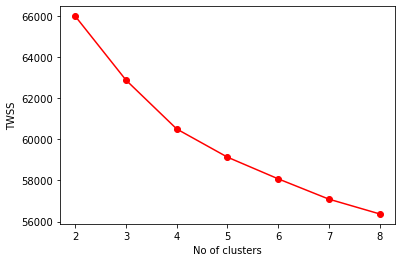

In [35]:
#plot in Scree
plt.plot(k,TWSS, 'ro-');plt.xlabel('No of clusters');plt.ylabel('TWSS')
plt.show()
# we can assume the no. of clusters as 3

In [36]:
# get the model
model = KMeans(n_clusters=3)
model.fit(data_new)
model.labels_

array([2, 0, 2, ..., 0, 1, 0])

In [37]:
clust=pd.Series(model.labels_)


In [48]:
Dataset['clust']=clust
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [49]:
Dataset_new = Dataset.iloc[:,[24,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]

In [46]:
Dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Vehicle Size                   9134 non-null   object 
 1   Customer                       9134 non-null   object 
 2   State                          9134 non-null   object 
 3   Customer Lifetime Value        9134 non-null   float64
 4   Response                       9134 non-null   object 
 5   Coverage                       9134 non-null   object 
 6   Education                      9134 non-null   object 
 7   Effective To Date              9134 non-null   object 
 8   EmploymentStatus               9134 non-null   object 
 9   Gender                         9134 non-null   object 
 10  Income                         9134 non-null   int64  
 11  Location Code                  9134 non-null   object 
 12  Marital Status                 9134 non-null   o

In [50]:
out = Dataset_new.iloc[:,[3,10,13,14,15,16,17,22]].groupby(Dataset_new.clust).mean()

In [51]:
out

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
clust,,,,,,,,
0,7694.729934,2606.309401,94.106307,15.146370,48.738992,0.379215,2.995240,609.906402
1,7919.789237,51490.098045,92.512295,15.345523,48.201450,0.406368,3.011349,384.111842
2,8310.706386,50585.705318,93.221157,14.831735,47.444348,0.367916,2.903226,351.348516


In [ ]:
Dataset_new.to_csv("Auto_insur_dataset_ans.")